# Лабораторная работа №1
## Выполнила: Груздева Диана Максимовна, группа 3822М1ПМкн1

### 1) Загрузка датасета

In [90]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [["training_images","train-images-idx3-ubyte.gz"],
            ["test_images","t10k-images-idx3-ubyte.gz"],
            ["training_labels","train-labels-idx1-ubyte.gz"],
            ["test_labels","t10k-labels-idx1-ubyte.gz"]]

base_url = "http://yann.lecun.com/exdb/mnist/"
for name in filename:
    print("Downloading " + name[0] + "...")
    request.urlretrieve(base_url + name[1], name[1])
print("Download completed.")

mnist = {}
for name in filename[:2]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28)
for name in filename[-2:]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
with open("mnist.pkl", 'wb') as f:
    pickle.dump(mnist,f)
print("Save completed.")

with open("mnist.pkl",'rb') as f:
    mnist = pickle.load(f)
    
x_train, t_train, x_test, t_test = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

Download completed.
Save completed.


#### Визуализируем загруженный датасет

x_train

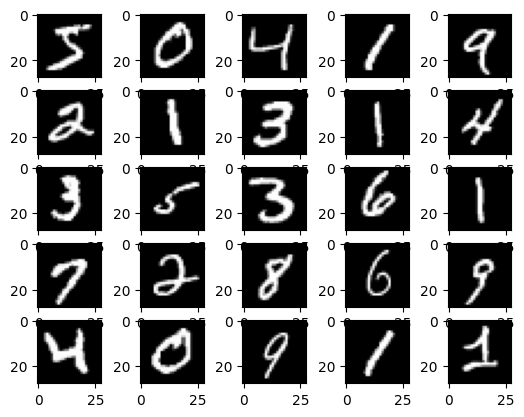

In [56]:
import matplotlib.pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))

x_test

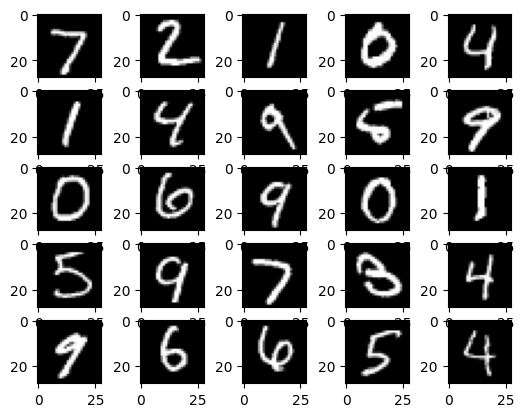

In [54]:
for i in range(25):
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))

#### Выводим размерности

In [83]:
print('Training data shape: {}'.format(x_train.shape))
print('Test data shape: {}'.format(x_test.shape))
print('Training labels data shape: {}'.format(t_train.shape))
print('Test labels data shape: {}'.format(t_test.shape))
print('Training data type: {}'.format(x_train.dtype))

Training data shape: (60000, 784)
Test data shape: (10000, 784)
Training labels data shape: (60000,)
Test labels data shape: (10000,)
Training data type: uint8


#### Нормализуем тренировочную выборку и поменяем размерность у массивов меток

In [91]:
x_train_normalized = x_train / 255
t_train = np.eye(10)[t_train]
t_test = np.eye(10)[t_test]

print('Training labels data shape: {}'.format(t_train.shape))
print('Test labels data shape: {}'.format(t_test.shape))

Training labels data shape: (60000, 10)
Test labels data shape: (10000, 10)


### 2) Создание сети

#### Зададим дефолтные значения параметров

In [88]:
DEFAULT_INPUT_W = 28
DEFAULT_INPUT_H = 28
DEFAULT_OUTPUT_COUNT = 10
DEFAULT_HIDDEN_COUNT = 300
DEFAULT_LEARNING_RATE = 0.1
DEFAULT_BATCH_SIZE = 8
DEFAULT_EPOCH_COUNT = 20

In [89]:
class MnistNetwork:
    def __init__(self, input_layer=DEFAULT_INPUT_W * DEFAULT_INPUT_H, output_layer=DEFAULT_OUTPUT_COUNT, hidden_layer=DEFAULT_HIDDEN_COUNT):
        self.input_layer = input_layer
        self.output_layer = output_layer
        self.hidden_layer = hidden_layer
